<a href="https://colab.research.google.com/github/daddyawesome/data_science/blob/master/_notebooks/2020-12-30-Regression_Modeling_in_Practice_w2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Modeling in Practice
> Test a Basic Linear Regression Model.

- toc: true 
- badges: true
- comments: true
- categories: [Linear Regression Model, Python, Google Colab]
- image: images/chart-preview.png




# About

This notebook is a demonstration of a Basic Linear Regression Model using Google Colab.    


---


## Regression Modeling in Practice
### Week 2: Test a Basic Linear Regression Model

We are now going to test a basic linear regression model.

To answer the question, what is the realtionship between internet use rate and income per person in Asian Countries. 

But before we run the model though, we will need  to center the mean of the explanatory variable, income per person.

**Data**
Data for this study comes from the Gapminder World Dataset collected by the Gapminder Foundation. The Gapminder World Dataset contains data collected from more than 200 countries/areas for more 500 variables.

**Description of Variables**
Below is the description of the variables

1. Internet User Rate
>The internet use rate of a country was collected by the World Bank in their World Development Indicators.
2. Income per Person
> Income per person is simply Gross Domestic Product per capita (the country’s total, country-wide income divided by the population)
3. Continents (I will use this data to get Asian contries from gapminder)
 

## First, Start with import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Second, load the data   


### load gapminder dataset

I will be using url to get the data online

In [2]:
# df as dataframe from gapminder dataset
url = 'https://raw.githubusercontent.com/daddyawesome/Coursera_Capstone/master/data/gapminder.csv'
df = pd.read_csv(url)

df.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.65412162280064,48.673,,0,,6.68438529968262,55.7000007629394,24.04
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.9899469578783,76.918,,9,636.341383366604,7.69932985305786,51.4000015258789,46.72
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.5000733055148,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22
3,Andorra,21943.3398976022,10.17,,,,,,81,,,,,5.36217880249023,,88.92
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.99995388324075,51.093,,-2,172.999227388199,14.5546770095825,75.6999969482422,56.7


In [3]:
# df_continent as dataframe for teh continent data set
url2='https://raw.githubusercontent.com/dbouquin/IS_608/master/NanosatDB_munging/Countries-Continents.csv'
df_continent = pd.read_csv(url2)
df_continent = df_continent.rename(columns={'Country': 'country'})
df_continent.head()

,Continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


### let's merge the two dataframe `df` and `df_continent`

In [4]:
df_outer = pd.merge(df_continent, df, on='country', how='outer')

df_outer.head()

,Continent,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Africa,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.5000733055148,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22
1,Africa,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.99995388324075,51.093,,-2,172.999227388199,14.5546770095825,75.6999969482422,56.7
2,Africa,Benin,377.039699461343,2.08,.2233986,28.1,37950000,58.2000007629394,1.2,3.12996180338983,56.081,,7,38.2229433578852,6.05773973464966,71.5999984741211,41.2
3,Africa,Botswana,4189.43658749046,6.97,1.1319097,33.4,78943333.3333333,38.7000007629394,24.8,5.9998355754858,53.183,,8,454.795705303917,11.2139701843262,46,59.58
4,Africa,Burkina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## New DataFrame for Analysis
We create a dataframe `sub` out from the merge dataframe `df_outer` to create a dataframe that only contains our needed data

In [5]:
sub = df_outer[['Continent','incomeperperson','internetuserate']].dropna()
sub.head()

,Continent,incomeperperson,internetuserate
0,Africa,2231.99333515006,12.5000733055148
1,Africa,1381.00426770244,9.99995388324075
2,Africa,377.039699461343,3.12996180338983
3,Africa,4189.43658749046,5.9998355754858
5,Africa,115.305995904875,2.10021270579814


Set the variables to numeric

In [8]:
sub['internetuserate'] = sub['internetuserate'].apply(pd.to_numeric, errors='coerce')
sub['incomeperperson'] = sub['incomeperperson'].apply(pd.to_numeric, errors='coerce')

We only need Asian countries so we create another datframe for asian countire we names it `sub_asia`

In [10]:
# creating New DataFrame For Each Continents
df_clean=sub.dropna()
sub_asia=df_clean[(df_clean['Continent']== 'Asia')]
sub_asia.head()

,Continent,incomeperperson,internetuserate
55,Asia,12505.212545,54.992809
56,Asia,558.062877,3.700003
57,Asia,1324.194906,13.598876
58,Asia,17092.460004,49.989975
60,Asia,557.947513,1.259934


### Center the explanatory variable; 

ie, set the mean of the data to equal zero

In [11]:
data_centered = sub_asia.copy()
data_centered['incomeperperson'] = data_centered['incomeperperson'].subtract(data_centered['incomeperperson'].mean())
print ('Mean of', data_centered[['incomeperperson']].mean())

Mean of incomeperperson    1.162132e-12
dtype: float64


The mean is not exactly 0 due to errors in float representation   





---
<br>
<br>

### Run scatterplot of internetuserate with centered incomeperperson

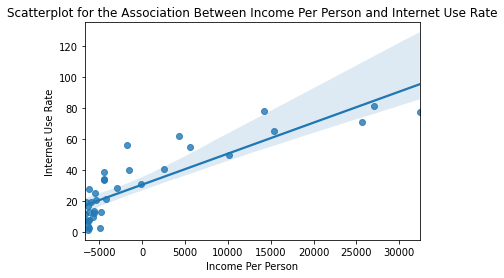

In [13]:
scat1 = sns.regplot(x="incomeperperson", y="internetuserate", scatter=True, data=data_centered)
plt.xlabel('Income Per Person')
plt.ylabel('Internet Use Rate')
plt.title ('Scatterplot for the Association Between Income Per Person and Internet Use Rate in Asia')
plt.show()

### OLS regression model for the association between income per person and internet use rate

In [14]:
reg1 = smf.ols('internetuserate ~ incomeperperson', data=data_centered).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        internetuserate   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     104.7
Date:                Wed, 30 Dec 2020   Prob (F-statistic):           6.43e-12
Time:                        19:19:57   Log-Likelihood:                -139.81
No. Observations:                  36   AIC:                             283.6
Df Residuals:                      34   BIC:                             286.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          30.5362      2.017     15.140      0.000      26.437      34.635
incomeperperson     0.0020      0.000     10.234      0.000       0.002       0.002
==============================================================================
Omnibus:                        1.752   Durbin-Watson:                   2.375
Prob(Omnibus):                  0.416   Jarque-Bera (JB):                1.619
Skew:                           0.481   Prob(JB):                        0.445
Kurtosis:                       2.606   Cond. No.                     1.03e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Note that the majority of data points are clustered near, but below, 0 with a long tail reaching to the right. This is in agreement with the mean centered at 0 and also indicative that the vast majority of countries have low incomes with a few having very, very high incomes. 

The results indicate that income per person is significantly and positively associated with internet use rate in a country according to the equation **`[internet use rate] = .002 * [income per person] + 30.362`**. I suspect a linear regression line is not the best fit possible, the curve does appear to be logarithmic in shape; but for the sake of this demonstration a linear line is fine.